Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Support Vector Regression

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'E:\Github\Datasets\Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


#### Splitting of the dataset

In [51]:
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1) # Because StandardScaler Class expects arrays in 2D as input

In [52]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [53]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

#### Scaling the features as well as target

In [54]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [55]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [56]:
X_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [57]:
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#### Building SVR model

In [58]:
svr_regressor = SVR(kernel='rbf')

In [59]:
svr_regressor.fit(X_scaled,y_scaled.ravel())

SVR()

In [60]:
y_pred_train = svr_regressor.predict(X_scaled)
y_pred_train

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [61]:
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_train

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

In [65]:
user_input = input('Enter the position level (as integer): ')

Enter the position level (as integer): 6.3


In [64]:
def get_predictions_svr_model(user_input):
    try:
        user_input = float(user_input)
    except:
        return "Invalid input! Please try again with integer as input."
    
    user_input = np.array(user_input).reshape(-1,1)
    user_input = scaler_X.transform(user_input)
    prediction = svr_regressor.predict(user_input)
    return scaler_y.inverse_transform(prediction.reshape(-1,1))

In [66]:
get_predictions_svr_model(user_input)

array([[158889.77747515]])

#### Analysis of the results

In [72]:
def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [73]:
def get_prediction_metrics(y_actual_train, y_pred_train, y_actual_test = 0, y_pred_test = 0, need_test_metrics = 0):
    
    train_metrics = dict()
    test_metrics = dict()
    
    # Getting training metrics
    for metric in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, rmse, r2_score]:
        train_metrics[metric.__name__+'_(train)'] = round(metric(y_actual_train, y_pred_train),2)
    
    # Getting test metrics
    if need_test_metrics:
        for metric in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, rmse, r2_score]:
            test_metrics[metric.__name__+'_(test)'] = round(metric(y_actual_test, y_pred_test),2)
    
    # Printing the values
    for metric in [mean_absolute_error, mean_squared_error, rmse, mean_absolute_percentage_error, r2_score]:
        print(f"\n{metric.__name__+'_(train)'}: {train_metrics[metric.__name__+'_(train)']}")
        if need_test_metrics:
            print(f"{metric.__name__+'_(test)'}: {test_metrics[metric.__name__+'_(test)']}")
    
    return train_metrics, test_metrics

In [74]:
pred_metrics = get_prediction_metrics(y_actual_train = y, 
                                      y_pred_train = y_pred_train)


mean_absolute_error_(train): 63332.39

mean_squared_error_(train): 20036494264.13

rmse_(train): 141550.32

mean_absolute_percentage_error_(train): 0.27

r2_score_(train): 0.75


#### Results Visualization

In [78]:
y_pred_train.ravel()

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

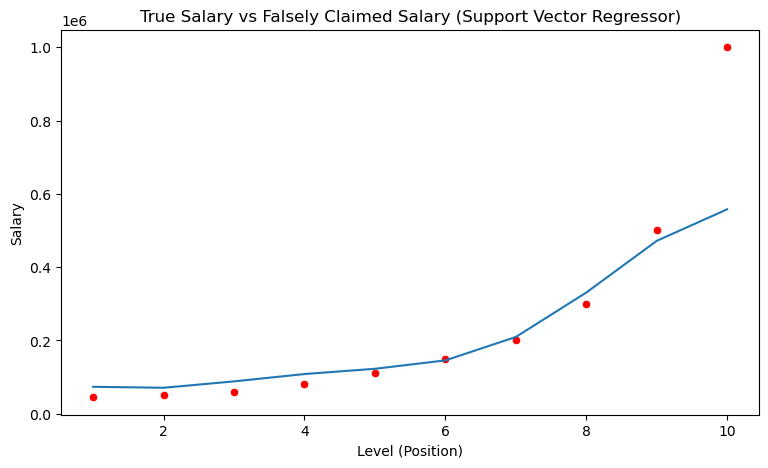

In [79]:
plt.figure(figsize=(9,5))
sns.scatterplot(x = X.ravel(), y = y.ravel() , color = 'red')
sns.lineplot(x = X.ravel(), y = y_pred_train.ravel())
plt.title("True Salary vs Falsely Claimed Salary (Support Vector Regressor)")
plt.xlabel("Level (Position)")
plt.ylabel("Salary");

In [100]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1,1)
X_grid_scaled = scaler_X.transform(X_grid)

y_pred_Xgrid = scaler_y.inverse_transform(svr_regressor.predict(X_grid_scaled).reshape(-1,1))

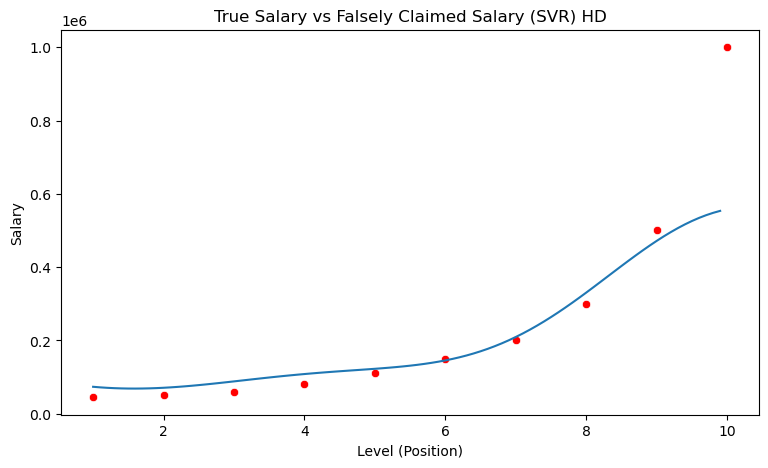

In [101]:
plt.figure(figsize=(9,5))
sns.scatterplot(x = X.ravel(), y = y.ravel() , color = 'red')
sns.lineplot(x = X_grid.ravel(), y = y_pred_Xgrid.ravel())
plt.title("True Salary vs Falsely Claimed Salary (SVR) HD")
plt.xlabel("Level (Position)")
plt.ylabel("Salary");